# <center><font color = 'Yellow'>  PUBG  Game Prediction</font></center>

<center><img src = "https://camo.githubusercontent.com/b0b4e8a9a479000558c4a95a91b6f706d44e3616395e6af4d9c81070b0ae4f71/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f5856627258343333766e3672716b6578536a2f67697068792e676966" width = 500></center>

## Table content 
1. [Importing Libraries](#import)
2. [Reading Data](#read)

# <font color = 'Yellow' > importing Libraries <a class = "anchor" id = "import"></a> </font>

In [2]:
# start date: 2020-05-01
#standard libraries 
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# handling warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import catboost as cb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




In [3]:
plt.rcParams['figure.figsize'] = (16, 6)

#  <font color = 'Yellow'>   Reading Data <a class = "anchor" id = "read"></a> </font> 

In [4]:
data = pd.read_csv('PUBG_Game_Prediction_data.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
#data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## <center> <font color = 'Yellow' > Data Descritption </font> </center>

# <font color = 'Blue'>

- <b>DBNOs -</b> Number of enemy players knocked.

- **assists -** Number of enemy players this player damaged that were killed by teammates.

- **boosts -** Number of boost items used.

- **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.

- **headshotKills -** Number of enemy players killed with headshots.

- **heals -** Number of healing items used.

- **Id -** Player’s Id

- **killPlace -** Ranking in match of number of enemy players killed.

- **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

- **killStreaks -** Max number of enemy players killed in a short amount of time.

- **kills -** Number of enemy players killed.

- **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

- **matchDuration -** Duration of match in seconds.

- **matchId -** ID to identify match. There are no matches that are in both the training and testing set.

- **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

- **rankPoints -** Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

- **revives -** Number of times this player revived teammates.

- **rideDistance -** Total distance traveled in vehicles measured in meters.

- **roadKills -** Number of kills while in a vehicle.

- **swimDistance -** Total distance traveled by swimming measured in meters.

- **teamKills -** Number of times this player killed a teammate.

- **vehicleDestroys -** Number of vehicles destroyed.

- **walkDistance -** Total distance traveled on foot measured in meters.- 

- **weaponsAcquired -** Number of weapons picked up.

- **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

- **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

- **numGroups -** Number of groups we have data for in the match.

- **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

- **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

</font>

# Data Wrangling

#### Check for the rows with missing win prediction value 

In [6]:
# check row with NULL win prediction value
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# remove the data row
data.drop(2744604, inplace = True)
# df = df.drop(2744604)

In [8]:
# prepare new parameter to know how many players are in a game
data['playersJoined'] = data.groupby('matchId')['matchId'].transform('count')

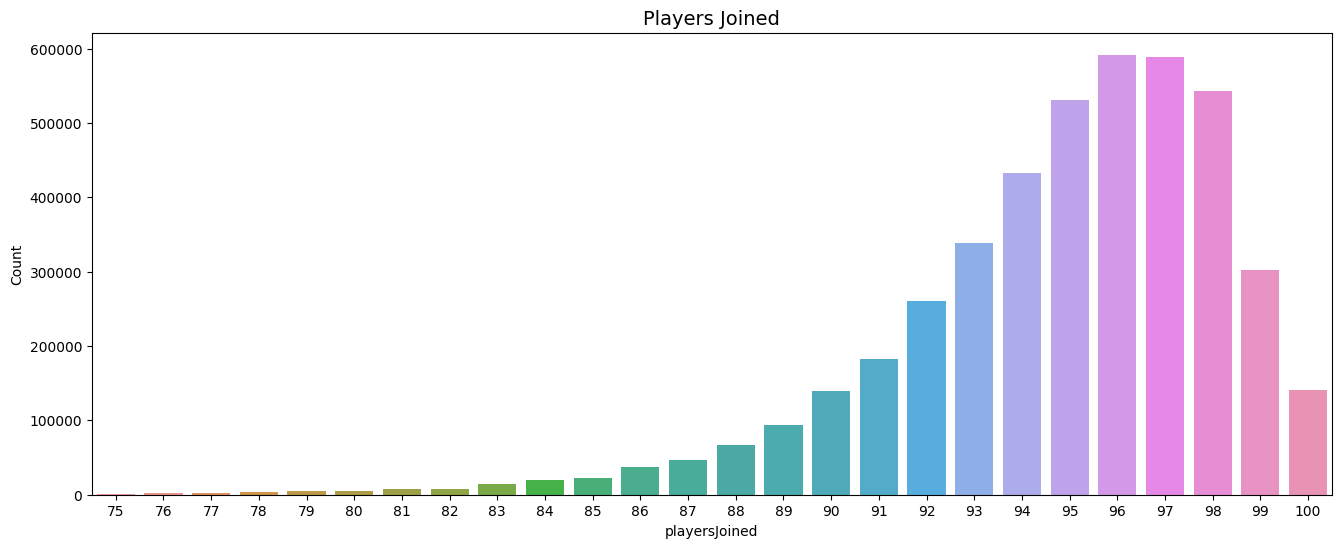

In [55]:
filtered_data_pj = data[data['playersJoined'] >= 75].reset_index()
sns.countplot(data = filtered_data_pj, x = 'playersJoined')
plt.title('Players Joined', fontsize = 14)
plt.xlabel('playersJoined')
plt.ylabel('Count')
plt.show()

## Analysing the data

##### Kills Without Moving?

<center><img src = "https://media.giphy.com/media/OPRbXcsGctvZC/giphy.gif"></center>

In [25]:
# prepare a data parameter to gather the information of the total distance travelled
data['totalDistance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
data['killswithoutMoving'] = ((data['kills']>0) & (data['totalDistance'] ==0))

In [26]:
data[data['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [27]:
data[data['killswithoutMoving'] == True].shape

(1535, 32)

In [28]:
# drop the table
data.drop(data[data['killswithoutMoving'] == True].index , inplace = True)

#### Extra-ordinary Road Kills?????

<center><img src = "https://media.giphy.com/media/3o7aD85usFbbbrCR3i/giphy.gif"></center>

In [29]:
data[data['roadKills'] > 5].shape


(46, 32)

In [30]:
data.drop(data[data['roadKills'] > 5].index , inplace = True)


### So many KILLS  - how ??
### setting the limit to 20 kills

<center><img src = "https://media.giphy.com/media/3oxHQfzBhpKtgdDWtW/giphy.gif"></center>

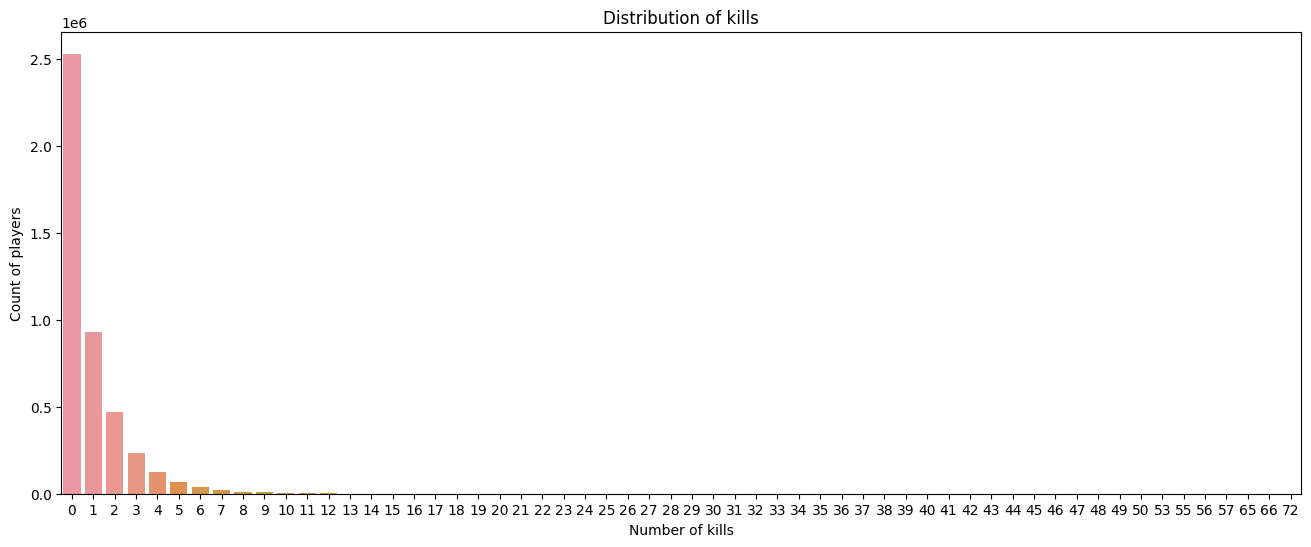

In [39]:
sns.countplot(data = data, x = data['kills'])
plt.title('Distribution of kills')
plt.xlabel('Number of kills')
plt.ylabel('Count of players')
plt.show()

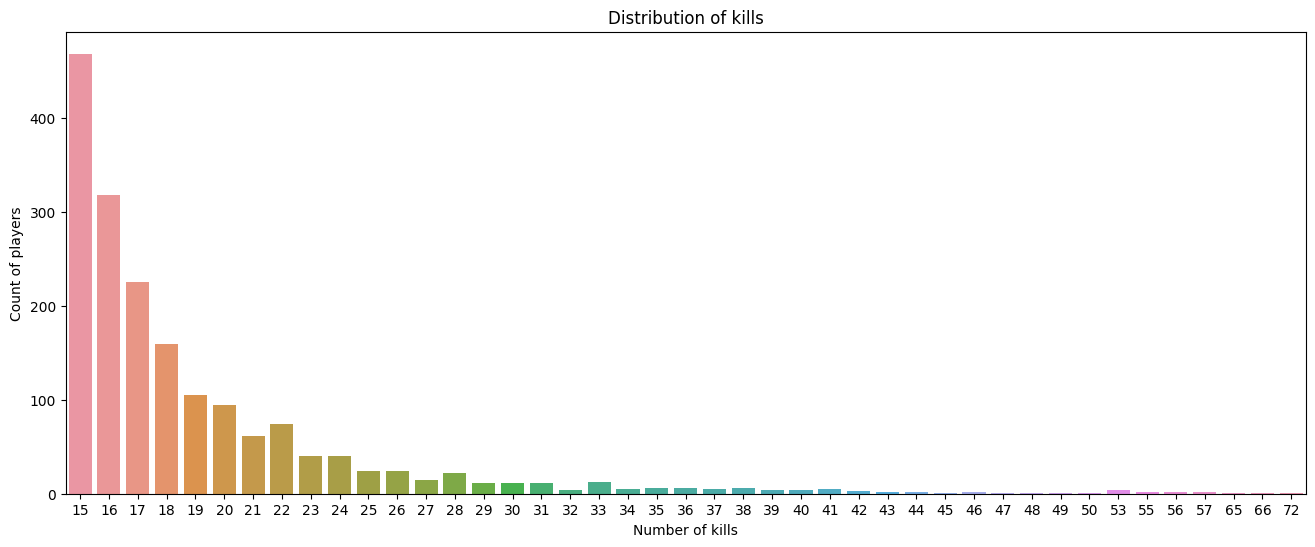

In [43]:
filtered_data = data[data['kills'] >= 15].reset_index()
sns.countplot(data=filtered_data, x='kills')
plt.title('Distribution of kills')
plt.xlabel('Number of kills')
plt.ylabel('Count of players')
plt.show()


In [44]:
# data dimension
data[data['kills'] > 20].shape


(417, 32)

In [45]:
data.drop(data[data['kills'] > 20].index, inplace = True)

### Anamoly detection for the headshot kills

<center><img src = "https://media.giphy.com/media/l3mZrOajz5VCZf7Hy/giphy.gif"></center>

In [46]:
data['headshot_rate'] = data['headshotKills']/data['kills']
data['headshot_rate'] = data['headshot_rate'].fillna(0)

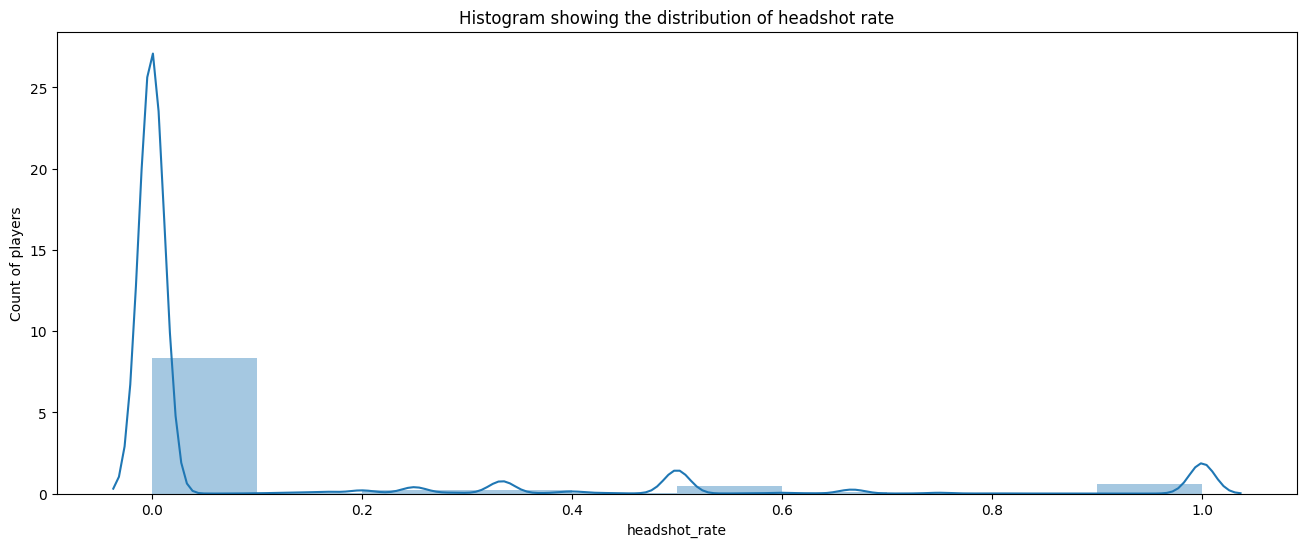

In [47]:
# plot the headshot rate distribution
sns.distplot(data['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()


In [48]:
data[(data['headshot_rate'] ==1) & (data['kills']>5)].shape

(187, 33)

In [49]:
data.drop(data[(data['headshot_rate'] == 1)& (data['kills'] > 6)].index, inplace = True)

## longest shot kill

<center><img src = "https://media.giphy.com/media/3ohs7YomxqOz4GRHcQ/giphy.gif"></center>

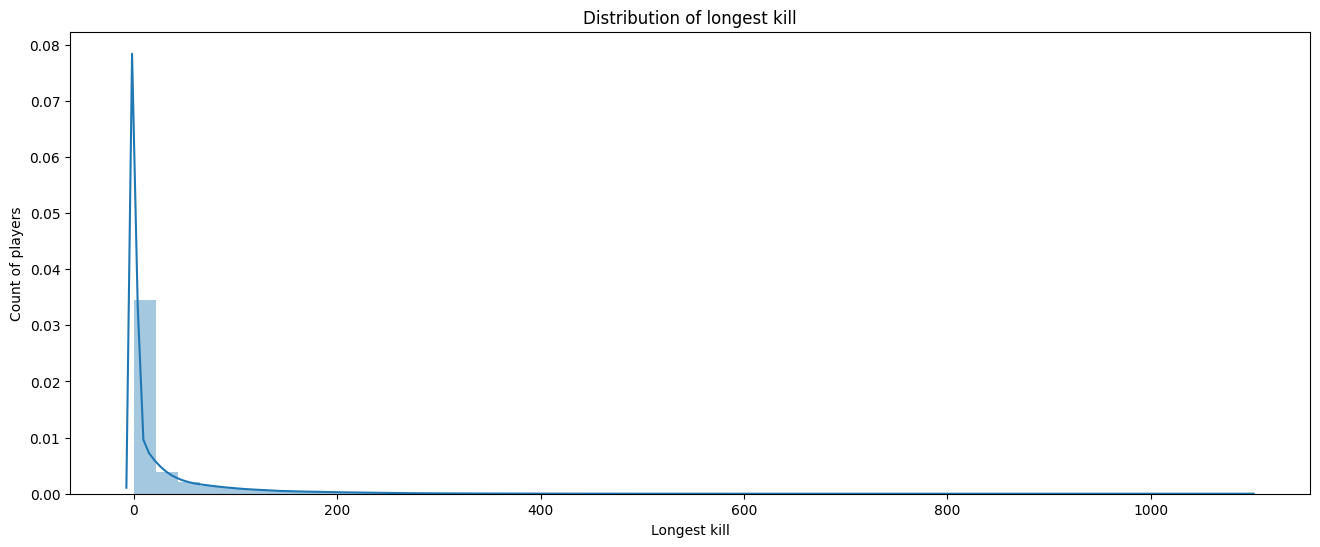

In [51]:
sns.distplot(data['longestKill'], bins = 50)
plt.title('Distribution of longest kill')
plt.xlabel('Longest kill')
plt.ylabel('Count of players')
plt.show()

In [56]:
data[data['longestKill'] >= 500].shape

(1747, 33)

In [57]:
data.drop(data[data['longestKill'] >= 500].index, inplace = True)

### weaopon change 
<center><img src = "https://j.gifs.com/3loOmn.gif"></center>

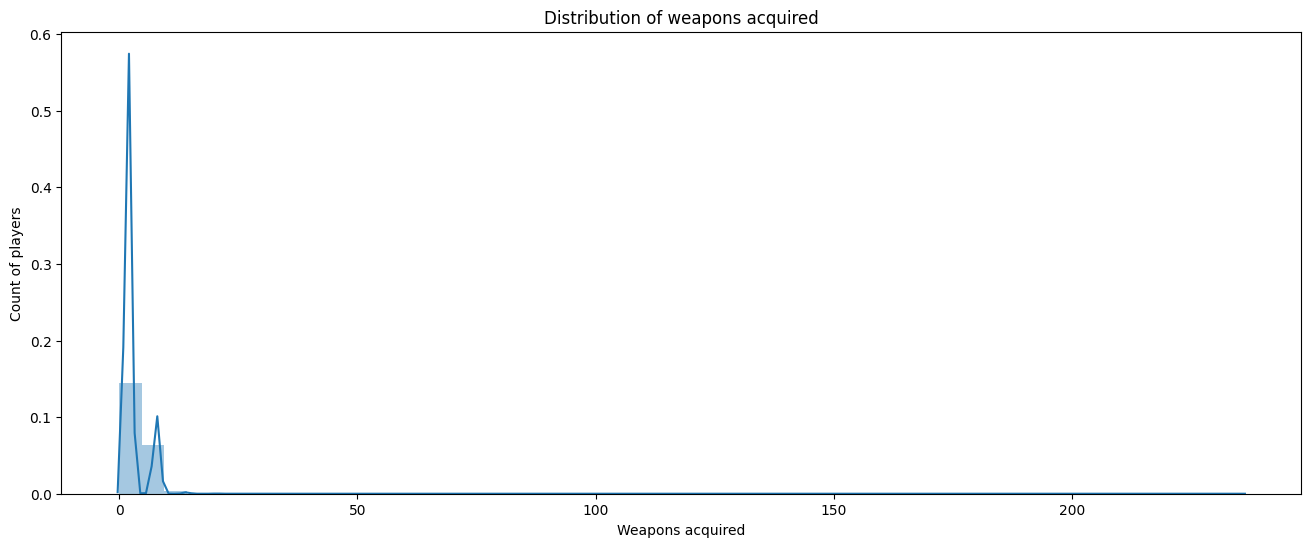

In [58]:
sns.distplot(data['weaponsAcquired'], bins = 50)
plt.title('Distribution of weapons acquired')
plt.xlabel('Weapons acquired')
plt.ylabel('Count of players')
plt.show()

In [60]:
data[data['weaponsAcquired'] >= 15].shape

(6809, 33)

In [61]:
data.drop(data[data['weaponsAcquired'] >= 15].index, inplace = True)

In [62]:
# shape after removing the outliers
data.shape

(4436306, 33)

In [63]:
# final check is there any null values
data.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

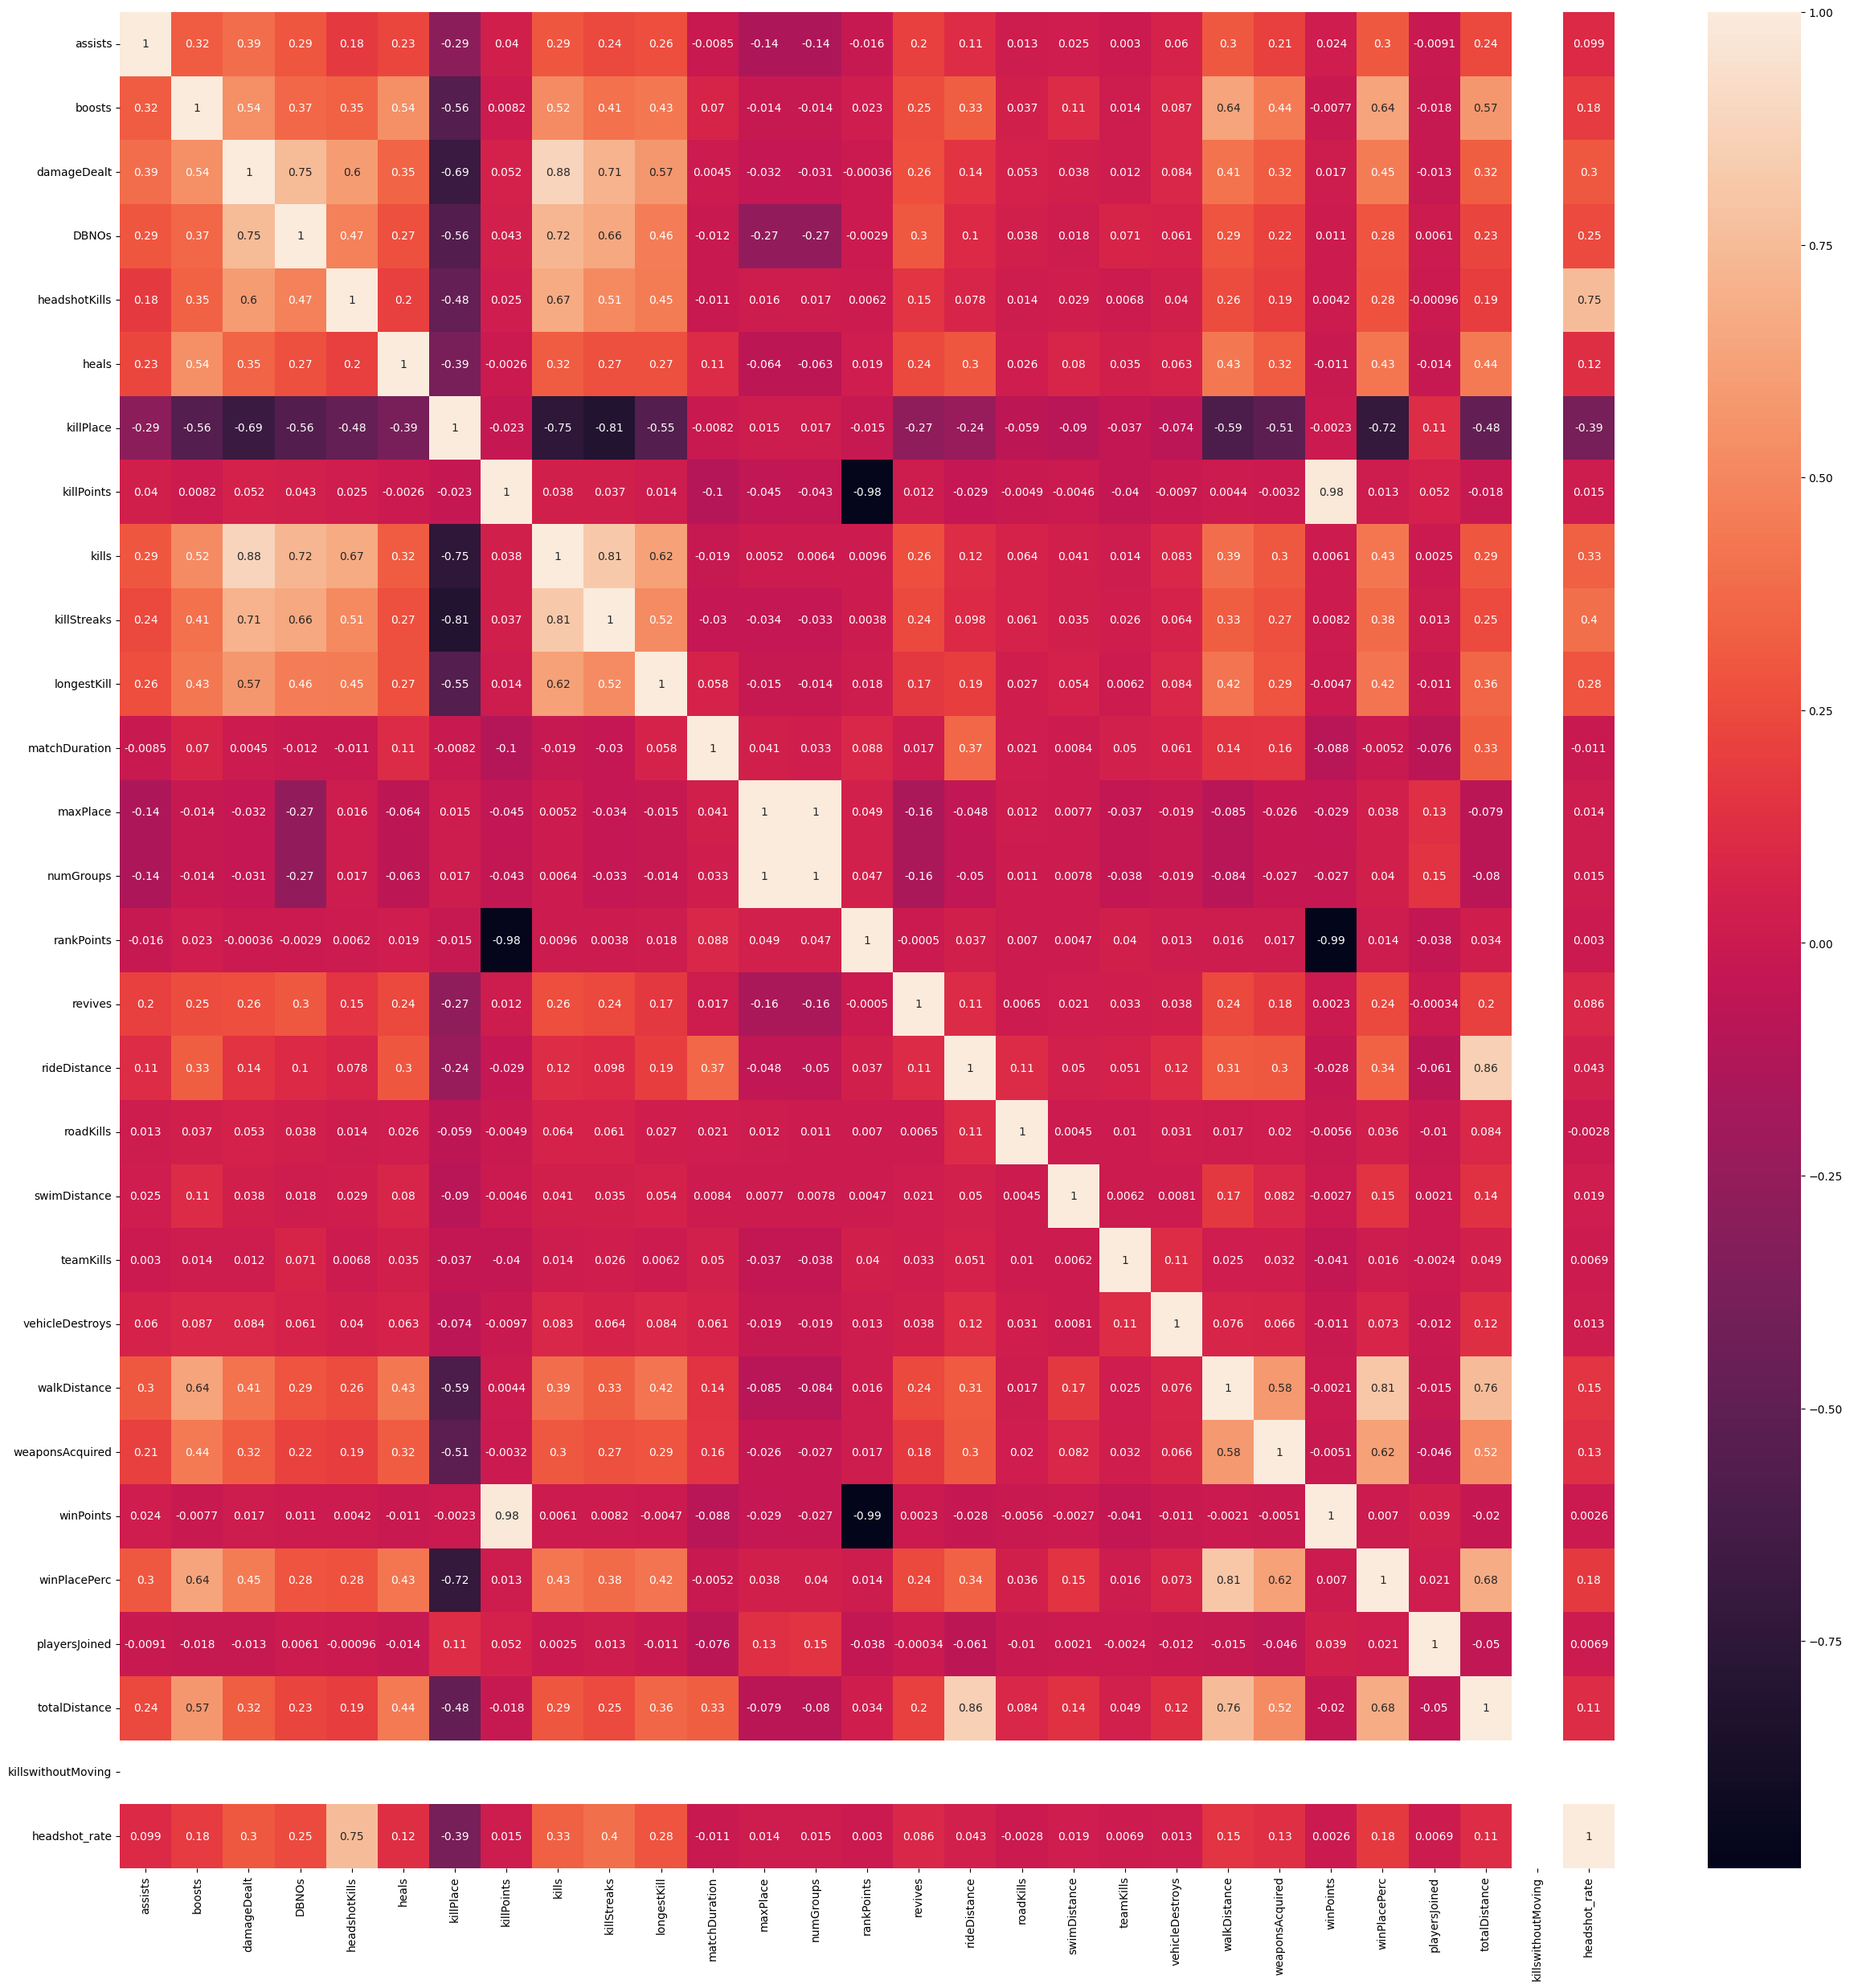

In [64]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
sns.heatmap(data.corr(), annot = True)
plt.show()

# <font color = "yellow">Feature Engineering</font><a class = "anchor" id = "feature"></a>

#### normalize_factor beacuse of the playersJoined parameter(if the playersJoined is less then the winPlacePerc will be less and vice versa)


In [65]:
normalising_factor = (100 - data['playersJoined']/100)+1

In [66]:
data['killsNorm'] = data['kills'] * normalising_factor
data['damageDealtNorm'] = data['damageDealt'] * normalising_factor
data['maxPlaceNorm'] = data['maxPlace'] * normalising_factor
data['matchDurationNorm'] = data['matchDuration'] * normalising_factor


data['traveldistance'] = data['walkDistance'] + data['swimDistance'] + data['rideDistance']
data['healsnboosts'] = data['heals'] + data['boosts']
data['assist'] = data['assists'] + data['revives']

In [67]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [68]:
df = data.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [70]:
df.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# <font color = "Yellow">ML - Catboost Model</font><a class = "anchor" id = "cat"></a>

### Handling Categorical Data

In [83]:
x = df.drop(['winPlacePerc'], axis = 1)
y = df['winPlacePerc']

#### changeing the data type of the column to numeric for the model to work

In [87]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [88]:
x.shape

(4436306, 40)

In [89]:
features = x.columns

#### Scaling the data 

In [74]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [75]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582937,-0.384018,0.449345,1.172485,-0.765100,-0.459622,-0.732886,-1.212390,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
1,-0.582937,-0.384018,0.340055,-0.804728,-0.765100,-0.459622,-0.775859,0.803564,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
2,-0.582937,-0.384018,-0.024245,-0.804728,-0.765100,-0.459622,0.169557,0.813067,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,-0.808936,0.0
3,-0.582937,-0.384018,0.995795,-0.804728,-0.765100,-0.459622,-0.560992,0.700391,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
4,-0.582937,-0.384018,-0.097105,-0.804728,0.647633,0.727371,2.232284,0.906738,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,2.696896,-0.405071,-0.808936,0.0


#### Splitting the data into train and test

In [76]:
xtrain , xtext , ytrain , ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [77]:
print(xtrain.shape , ytrain.shape)
print(xtext.shape , ytest.shape)


(3105414, 40) (3105414,)
(1330892, 40) (1330892,)


#### CatBoost Regressor Model

In [78]:
import catboost as cb

In [79]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtext , ytest)


In [80]:
model = cb.CatBoostRegressor(loss_function = 'RMSE')


In [81]:
# Grid Search

grid = {'iterations': [100, 150], 'learning_rate': [0.03, 0.1], 'depth': [2, 4, 6,  8]}
model.grid_search(grid, train_dataset)

0:	learn: 0.5482016	test: 0.5479886	best: 0.5479886 (0)	total: 309ms	remaining: 30.6s
1:	learn: 0.5333650	test: 0.5331566	best: 0.5331566 (1)	total: 457ms	remaining: 22.4s
2:	learn: 0.5189826	test: 0.5187815	best: 0.5187815 (2)	total: 631ms	remaining: 20.4s
3:	learn: 0.5050844	test: 0.5048926	best: 0.5048926 (3)	total: 832ms	remaining: 20s
4:	learn: 0.4916276	test: 0.4914432	best: 0.4914432 (4)	total: 1.02s	remaining: 19.3s
5:	learn: 0.4786251	test: 0.4784449	best: 0.4784449 (5)	total: 1.16s	remaining: 18.2s
6:	learn: 0.4660267	test: 0.4658539	best: 0.4658539 (6)	total: 1.32s	remaining: 17.5s
7:	learn: 0.4538495	test: 0.4536820	best: 0.4536820 (7)	total: 1.48s	remaining: 17.1s
8:	learn: 0.4420341	test: 0.4418693	best: 0.4418693 (8)	total: 1.75s	remaining: 17.7s
9:	learn: 0.4306331	test: 0.4304748	best: 0.4304748 (9)	total: 1.93s	remaining: 17.4s
10:	learn: 0.4195967	test: 0.4194453	best: 0.4194453 (10)	total: 2.11s	remaining: 17.1s
11:	learn: 0.4089243	test: 0.4087765	best: 0.4087765 (

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [90]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [91]:
feature_importance_df

,features,importance
2,killPlace,40.804634
14,totalDistance,12.507865
20,traveldistance,11.786296
16,killsNorm,7.596194
4,killStreaks,7.568429
19,matchDurationNorm,5.355363
13,playersJoined,4.684276
6,numGroups,2.265490
21,healsnboosts,1.830046
5,longestKill,1.805096


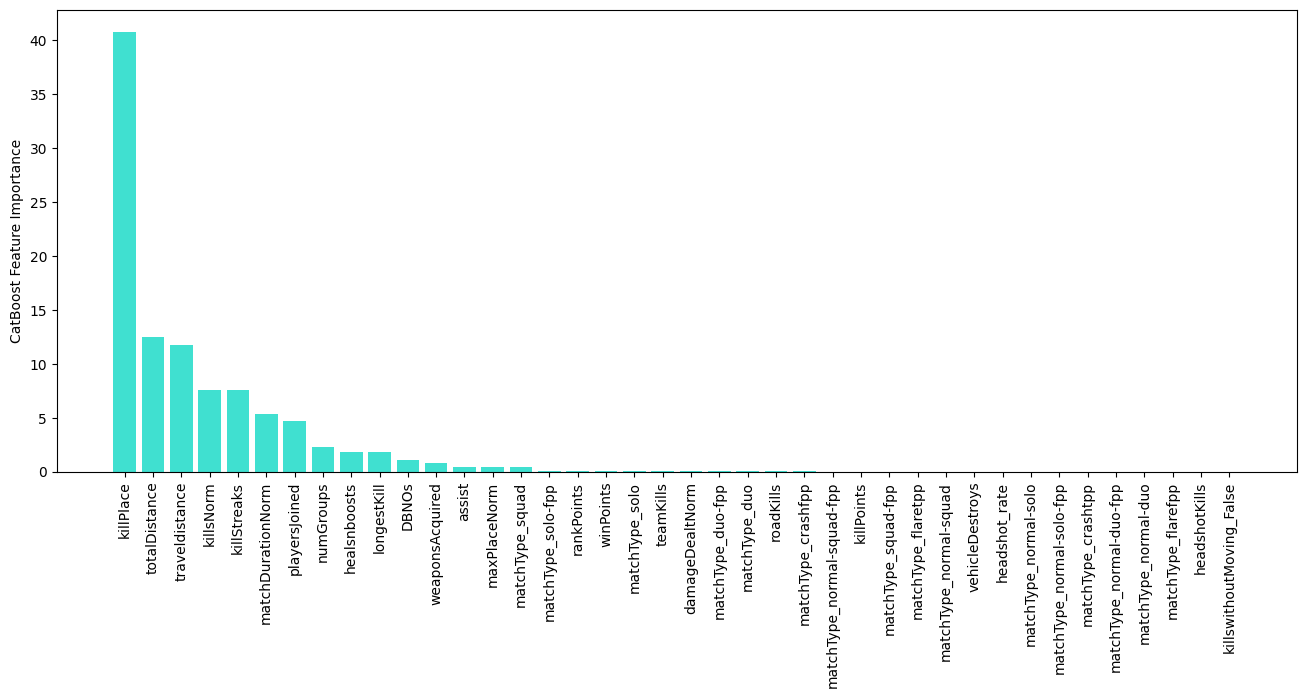

In [93]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

# Predictions

In [95]:
pred = model.predict(xtext)

In [96]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


<center><img src = "https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif"></center>